# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(weather_api_key)

0498980b6bcdc43e2d0289e0d2c811db


## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
Lattitude =[]
temp =[]
Humidity =[]
Cloudiness =[]
WindSpeed=[]
citysrr=[]
longitude=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"



query_url = f"{url}appid={weather_api_key}&units={units}&q="



In [47]:
for x in cities:
    response = requests.get(query_url + x ).json()
    try:
        Lattitude.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        WindSpeed.append(response['wind']['speed'])
        longitude.append(response['coord']['lon'])
        citysrr.append(x)
    except:
        print("x not found")
        pass   
    


x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found
x not found


In [48]:
weather_dict = {
    "city":citysrr,
    "Lattitude":Lattitude,
    "temp": temp,
    "Humidity":Humidity,
    "Cloudiness": Cloudiness,
    "WindSpeed" : WindSpeed,
    "longitude" : longitude,
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,Lattitude,temp,Humidity,Cloudiness,WindSpeed,longitude
0,bubaque,11.28,25.29,73,69,4.39,-15.83
1,butaritari,3.07,28.86,79,97,10.28,172.79
2,port macquarie,-31.43,30.66,51,13,6.70,152.92
3,rikitea,-23.12,26.60,78,43,2.34,-134.97
4,surt,31.21,10.98,85,0,1.74,16.59
...,...,...,...,...,...,...,...
544,abha,18.22,12.48,81,40,3.60,42.51
545,haileybury,47.45,-7.00,92,90,5.70,-79.64
546,sabha,27.04,12.56,36,85,4.62,14.43
547,qasigiannguit,68.82,-14.00,60,100,4.60,-51.19


In [49]:
weather_data.to_csv('wetherpycsv.csv')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

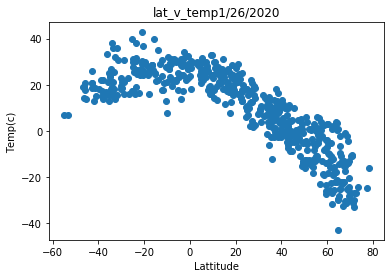

In [67]:
x_values = weather_data["Lattitude"]
y_values = weather_data["temp"]
plt.scatter(x_values,y_values)
plt.xlabel('Lattitude')
plt.ylabel('Temp(c)')
plt.title("lat_v_temp1/26/2020")
plt.show()

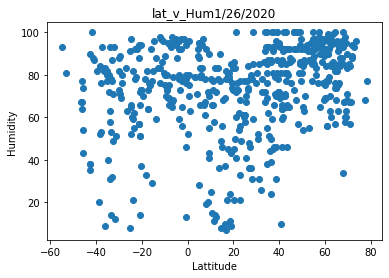

In [70]:
x_values = weather_data["Lattitude"]
y_values = weather_data["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.title("lat_v_Hum1/26/2020")
plt.show()

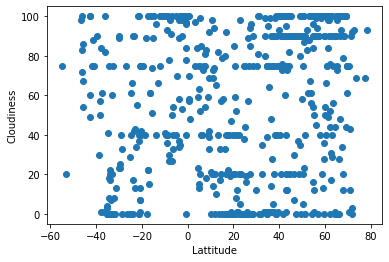

In [69]:
x_values = weather_data["Lattitude"]
y_values = weather_data["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
plt.title("lat_v_cloud1/26/2020")
plt.show()

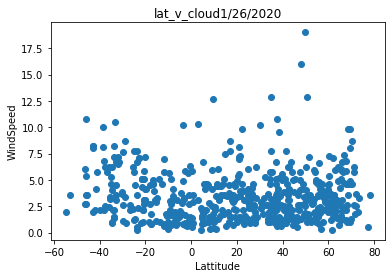

In [72]:
x_values = weather_data["Lattitude"]
y_values = weather_data["WindSpeed"]
plt.scatter(x_values,y_values)
plt.xlabel('Lattitude')
plt.ylabel('WindSpeed')
plt.title("lat_v_cloud1/26/2020")
plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot

## Linear Regression

In [54]:
# OPTIONAL: Create a function to create Linear Regression plots


In [55]:
# Create Northern and Southern Hemisphere DataFrames
sortedns=weather_data.sort_values(by=["Lattitude"])
sortedns


North= sortedns[sortedns.Lattitude >= 0 ]
North

,city,Lattitude,temp,Humidity,Cloudiness,WindSpeed,longitude
94,kilembe,0.20,23.72,52,100,1.35,30.00
215,thinadhoo,0.53,27.46,75,57,5.86,72.93
524,gorontalo,0.54,30.12,70,58,0.51,123.06
278,namasuba,0.69,18.06,96,100,0.95,32.42
375,sungairaya,0.70,29.65,80,70,2.88,108.90
...,...,...,...,...,...,...,...
81,khatanga,71.97,-26.79,88,0,3.61,102.50
113,upernavik,72.79,-26.82,93,93,1.92,-56.15
209,dikson,73.51,-24.40,96,69,3.32,80.55
143,qaanaaq,77.48,-24.86,68,69,0.48,-69.36


In [56]:
South= sortedns[sortedns.Lattitude <= 0 ]
South

,city,Lattitude,temp,Humidity,Cloudiness,WindSpeed,longitude
25,ushuaia,-54.80,7.00,93,75,1.95,-68.30
31,punta arenas,-53.15,6.85,81,20,3.60,-70.92
16,bluff,-46.60,18.89,67,98,2.68,168.33
96,kaitangata,-46.28,14.26,77,72,6.01,169.85
68,mataura,-46.19,18.89,64,83,3.58,168.86
...,...,...,...,...,...,...,...
453,biak,-0.91,29.16,76,78,3.55,122.88
296,sorong,-0.88,32.32,46,0,2.74,131.25
34,puerto ayora,-0.74,22.78,13,84,0.89,-90.35
445,port-gentil,-0.72,27.00,94,40,1.50,8.78


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8983225125200548


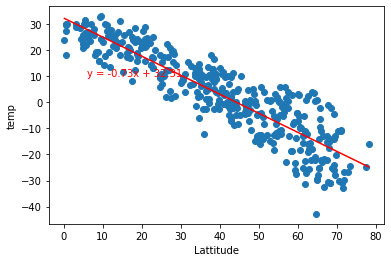

In [57]:
x_values = North['Lattitude']
y_values = North['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Lattitude')
plt.ylabel('temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.42374323625893406


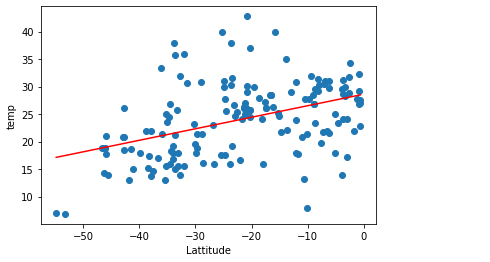

In [58]:
x_values = South['Lattitude']
y_values = South['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Lattitude')
plt.ylabel('temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.37395135411159874


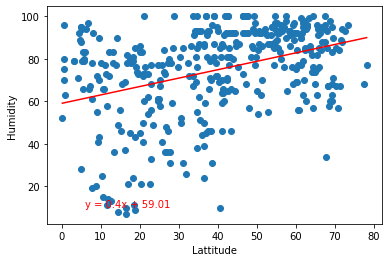

In [59]:
x_values = North['Lattitude']
y_values = North['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21965543987977854


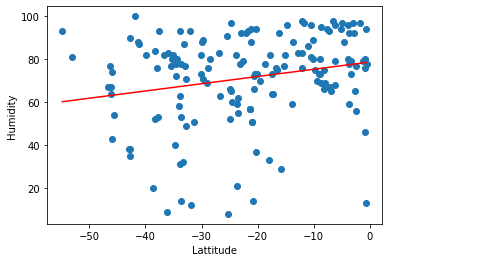

In [60]:
x_values = South['Lattitude']
y_values = South['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2548083191774852


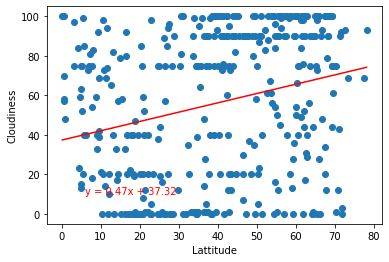

In [61]:
x_values = North['Lattitude']
y_values = North['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.251216900446691


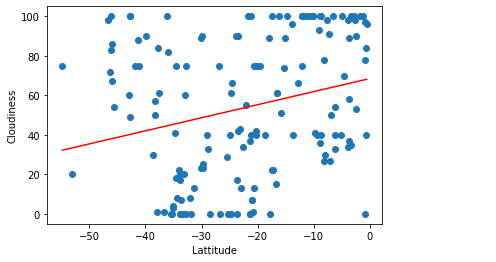

In [62]:
x_values = South['Lattitude']
y_values = South['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06504745079956403


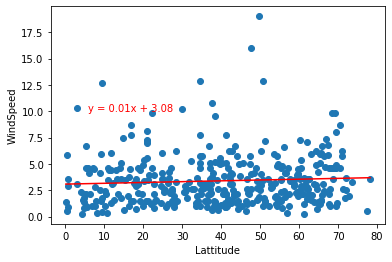

In [63]:
x_values = North['Lattitude']
y_values = North['WindSpeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Lattitude')
plt.ylabel('WindSpeed')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3288517139185196


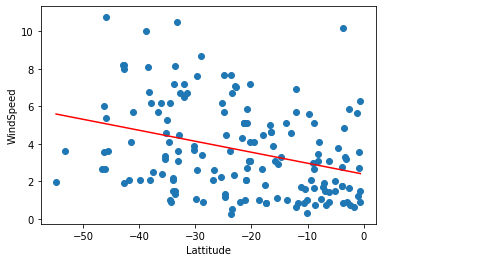

In [64]:
x_values = South['Lattitude']
y_values = South['WindSpeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Lattitude')
plt.ylabel('WindSpeed')
print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
#1)I notice in the as we get closer to the equater 0 lattitude it gets hotter
#2)I notice as we get closer to the equater 0 lat the wind slows 
#3)I notice as we get closer to the equater 0 lat it gets cloudier